In [1]:
import pandas as pd
data = pd.read_csv('glass.csv')

In [2]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
data.shape[0]

214

<AxesSubplot:>

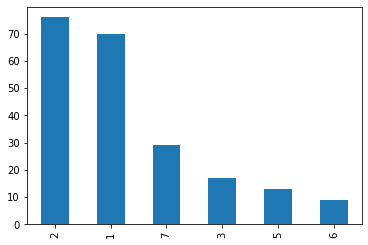

In [4]:
data.Type.value_counts().plot(kind='bar')

In [5]:
out_class_count = data.Type.unique()
out_class_count

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [6]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [7]:
x[0],y[0]

(array([1.52101e+00, 1.36400e+01, 4.49000e+00, 1.10000e+00, 7.17800e+01,
        6.00000e-02, 8.75000e+00, 0.00000e+00, 0.00000e+00]),
 1)

Normalization

In [8]:
import numpy as np
def normalize(x):
    return (x - np.min(x, axis=0))/(np.max(x, axis=0)-np.min(x, axis=0))
x = normalize(x)

In [9]:
x[0],y[0]

(array([0.43283582, 0.43759398, 1.        , 0.25233645, 0.35178571,
        0.00966184, 0.30855019, 0.        , 0.        ]),
 1)

KNN

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .3)

In [11]:
len(x_train),len(x_test)

(149, 65)

In [12]:
import math
def knn(k):
    y_pred = list()
    for test_sample in x_test:
        e_d = list()
        freq = dict.fromkeys(range(1,8),0)
        for (sample,lable) in zip(x_train,y_train):
            distance = 0
            for feature in range(len(x_train[0])):
                distance+=(test_sample[feature]-sample[feature])**2
            distance = math.sqrt(distance)
            e_d.append([distance,lable])
        e_d = sorted(e_d)[:k]
        for i in e_d:
            freq[i[1]]+=1
        y_pred.append(max(freq, key = freq.get))
    return y_pred

In [13]:
from sklearn.metrics import accuracy_score

k_list = [i for i in range(1,15,2)]
k_accuracy = list()
for k in k_list:
    y_pred = knn(k)
    k_accuracy.append(accuracy_score(y_pred,y_test))

In [14]:
k_accuracy 

[0.7692307692307693,
 0.7538461538461538,
 0.7076923076923077,
 0.7230769230769231,
 0.6615384615384615,
 0.676923076923077,
 0.676923076923077]

Text(0, 0.5, 'Accuracy')

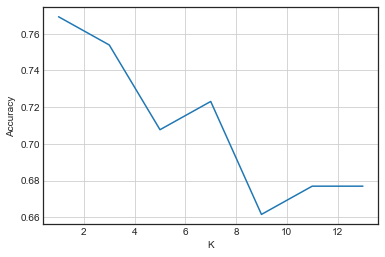

In [15]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
plt.plot(range(1,15,2), k_accuracy )
plt.grid()
plt.xlabel("K")
plt.ylabel("Accuracy")

In [18]:
print("Maximum test accuracy : " + str(max(k_accuracy)*100)+" %")

Maximum test accuracy : 76.92307692307693 %
